<a href="https://colab.research.google.com/github/gwegayhu/dashboards-app/blob/master/AI_ML_Model__House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [27]:
!pip install gdown #install gdown for downloading from google drive

import pandas as pd
import gdown

# Replace with your Google Drive file ID
file_id = '1RK566bVyR6drv5GvBF-pON-WVeuWF3aZ'
url = f'https://drive.google.com/uc?id={file_id}' #construct downloadable url

# Download the file to your local machine
output_file = 'data.csv' # name for the downloaded file
gdown.download(url, output_file, quiet=False) # downloads the file to colab

# Read the downloaded CSV file
z = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1RK566bVyR6drv5GvBF-pON-WVeuWF3aZ
To: /content/data.csv
100%|██████████| 41.1M/41.1M [00:00<00:00, 41.2MB/s]


In [31]:
!pip install gdown #install gdown for downloading from google drive

import pandas as pd
import gdown

# Replace with your Google Drive file ID
file_id = '1RK566bVyR6drv5GvBF-pON-WVeuWF3aZ'
# Construct the download URL using the file ID.
# The 'uc?export=download' part is crucial for downloading the raw file.
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file to your local machine
output_file = 'data.csv' # name for the downloaded file
gdown.download(url, output_file, quiet=False) # downloads the file

# Read the downloaded CSV file
z = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?export=download&id=1RK566bVyR6drv5GvBF-pON-WVeuWF3aZ
To: /content/data.csv
100%|██████████| 41.1M/41.1M [00:00<00:00, 75.6MB/s]


In [43]:
z.shape

(250000, 23)

In [44]:
z.size

5750000

In [45]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [46]:
z.dtypes

,0
ID,int64
State,object
City,object
Locality,object
Property_Type,object
BHK,int64
Size_in_SqFt,int64
Price_in_Lakhs,float64
Price_per_SqFt,float64
Year_Built,int64


In [47]:
z.ndim

2

In [48]:
z.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

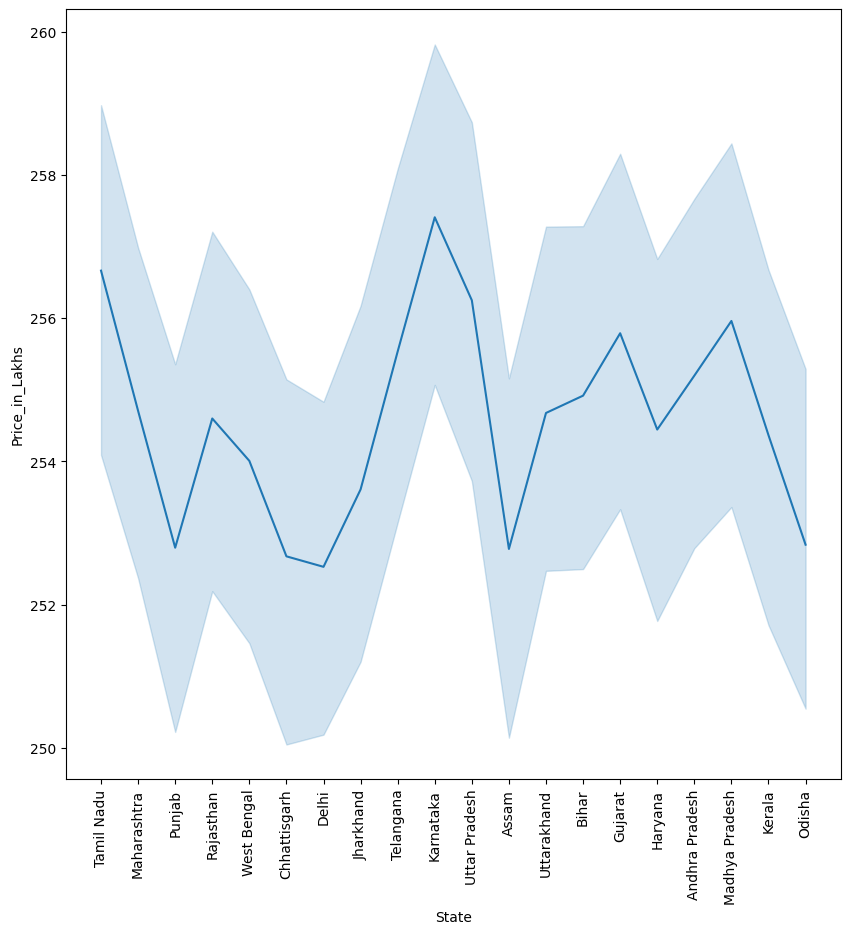

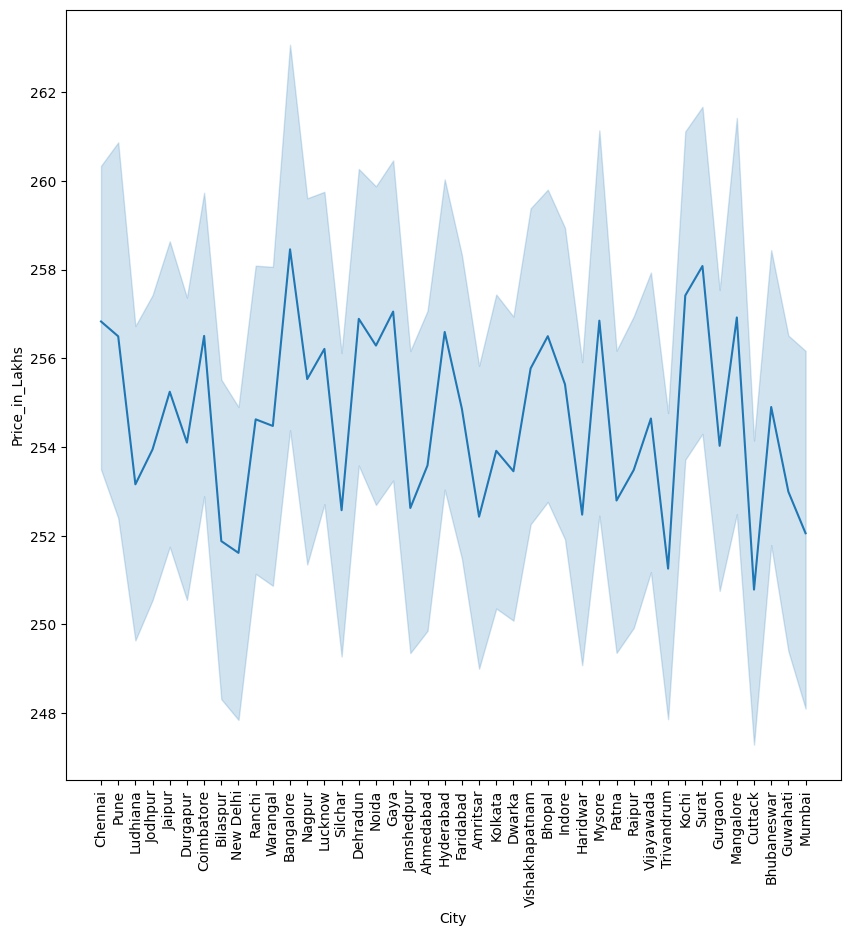

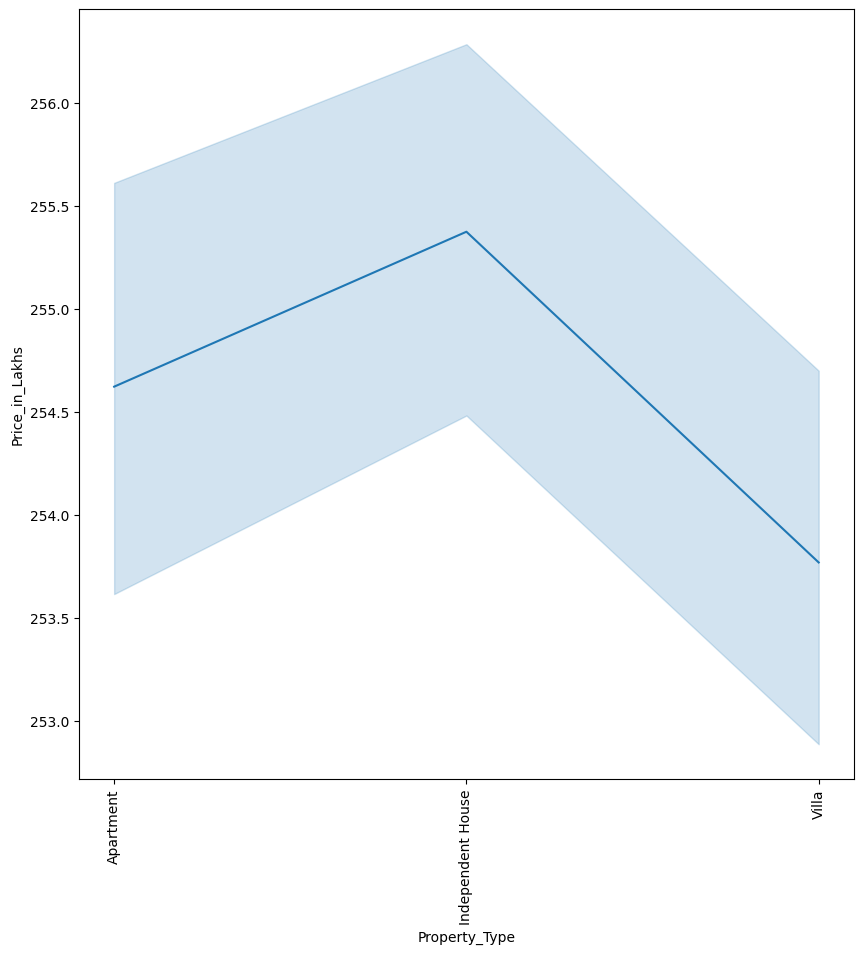

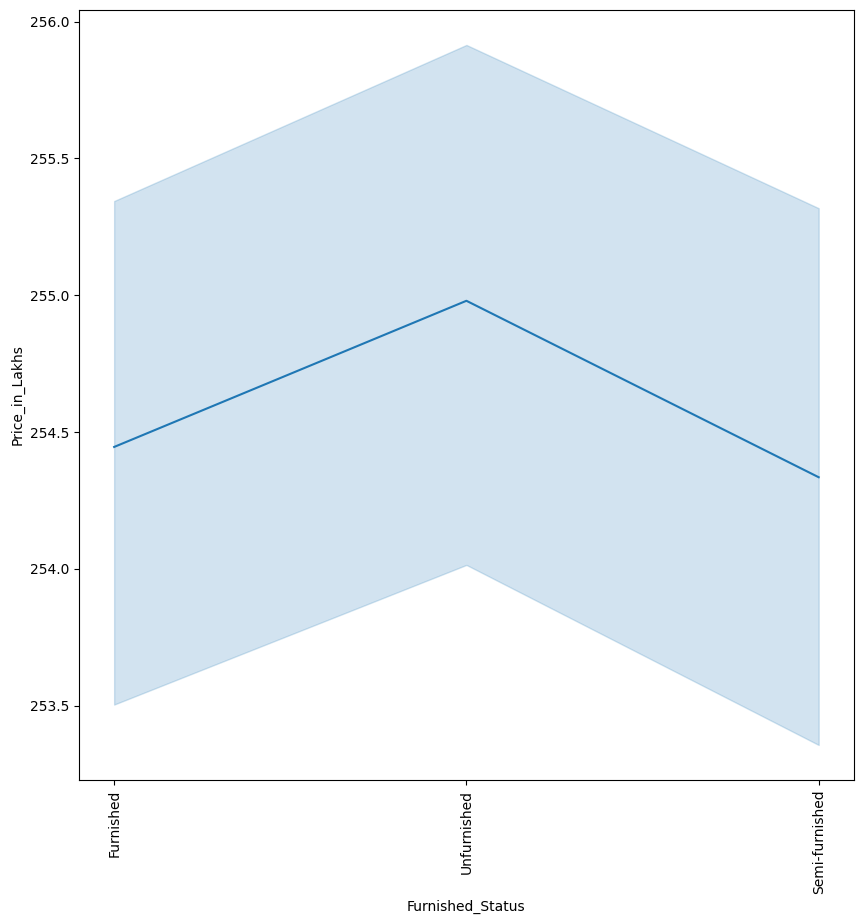

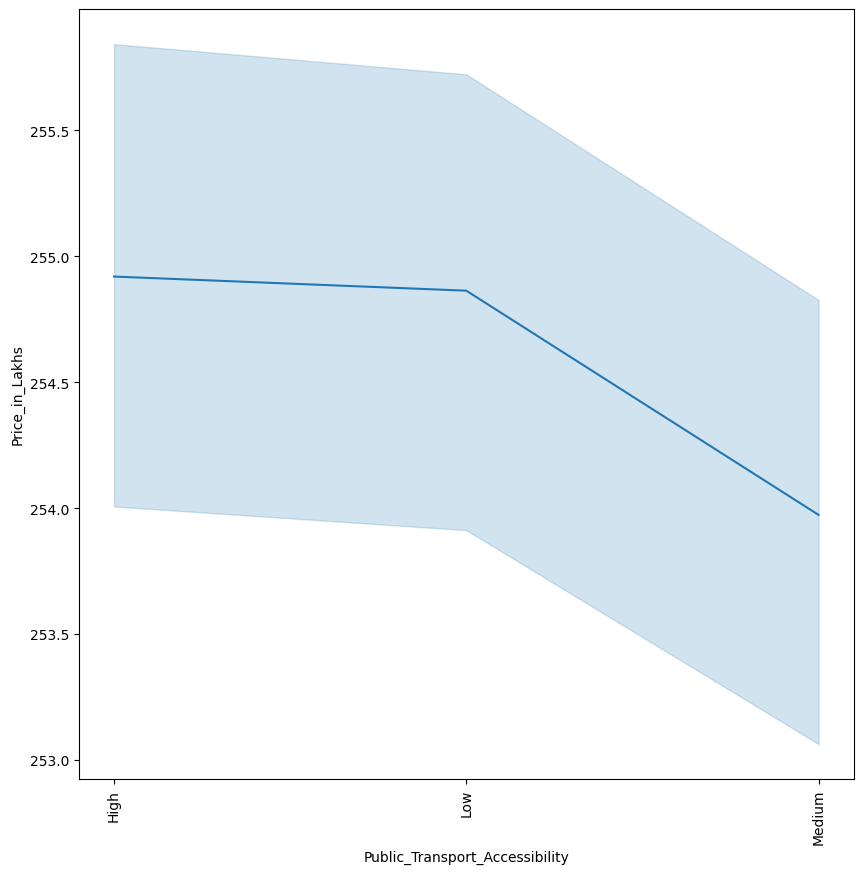

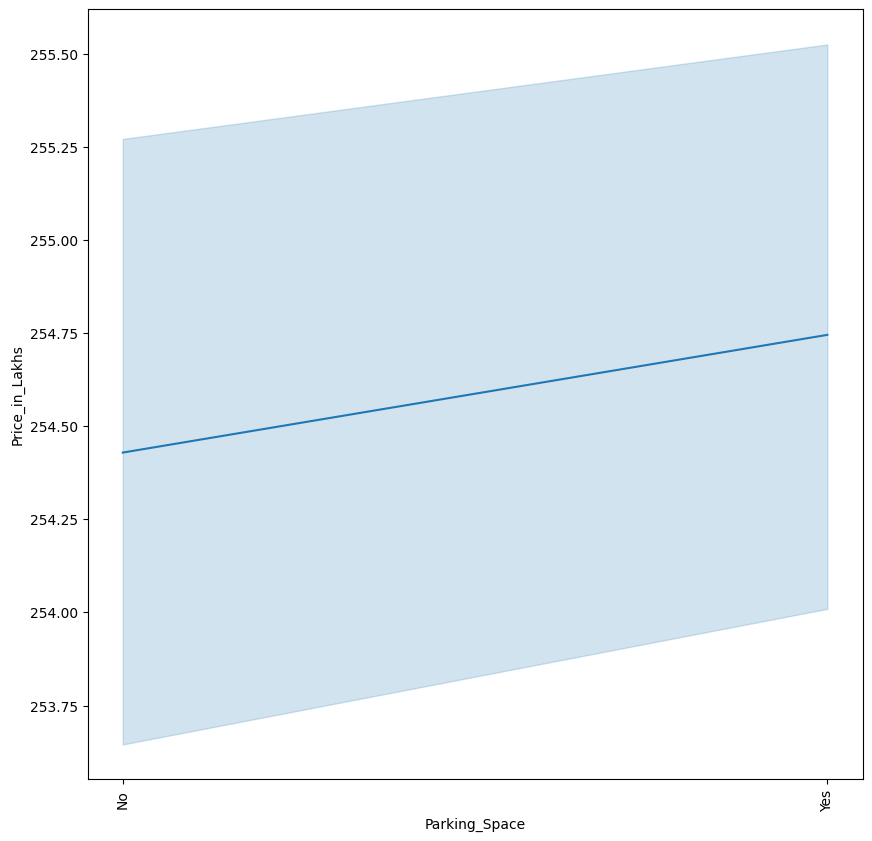

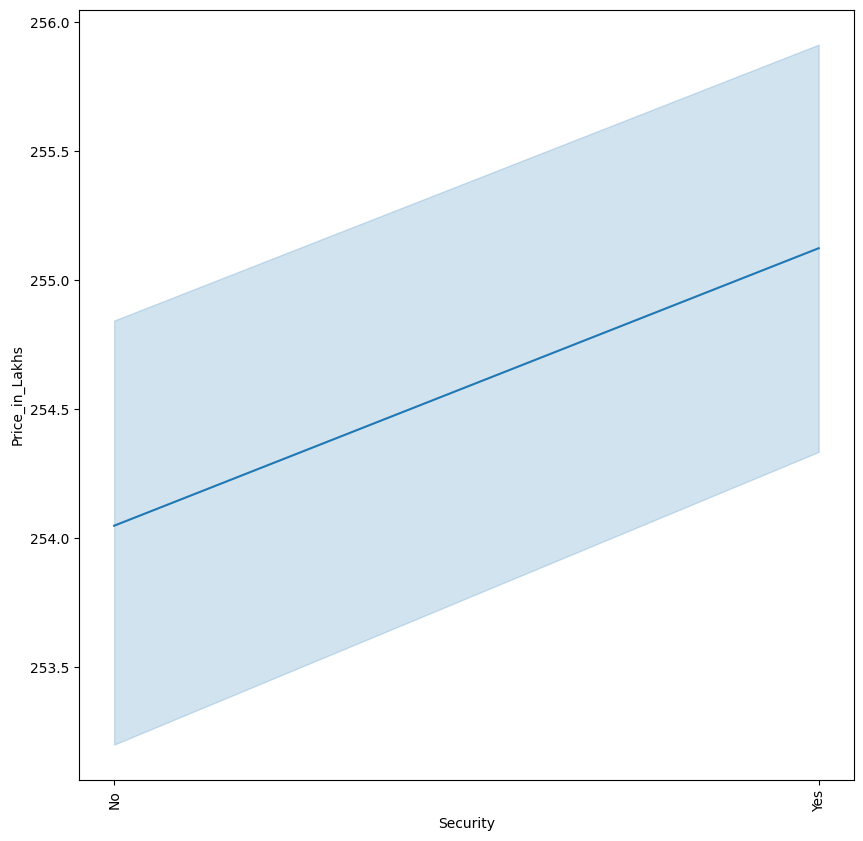

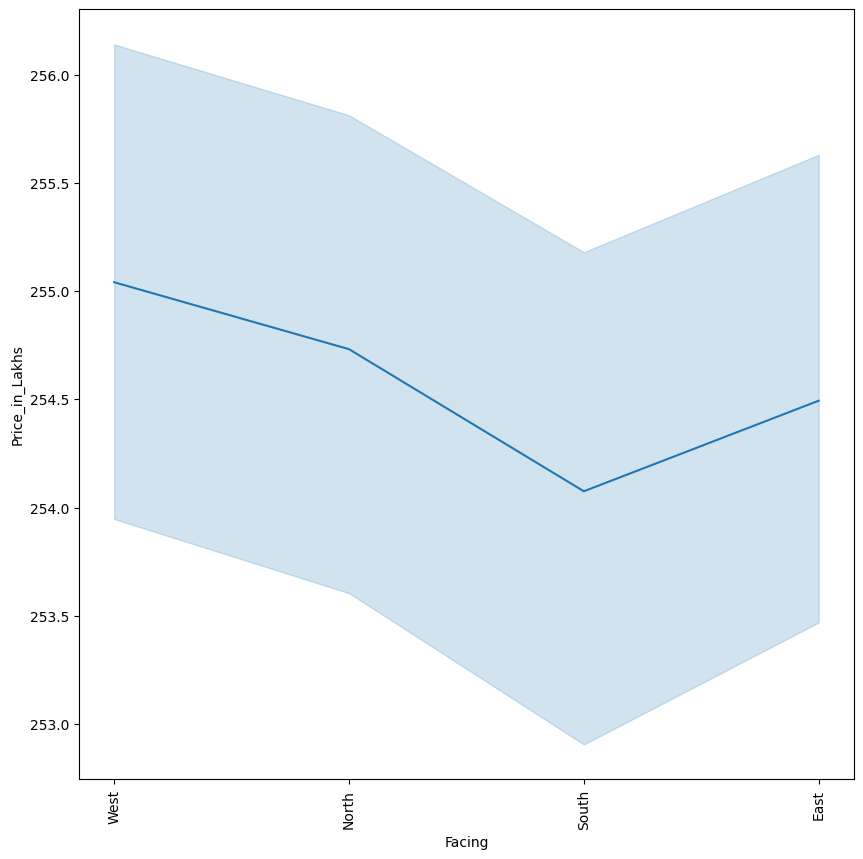

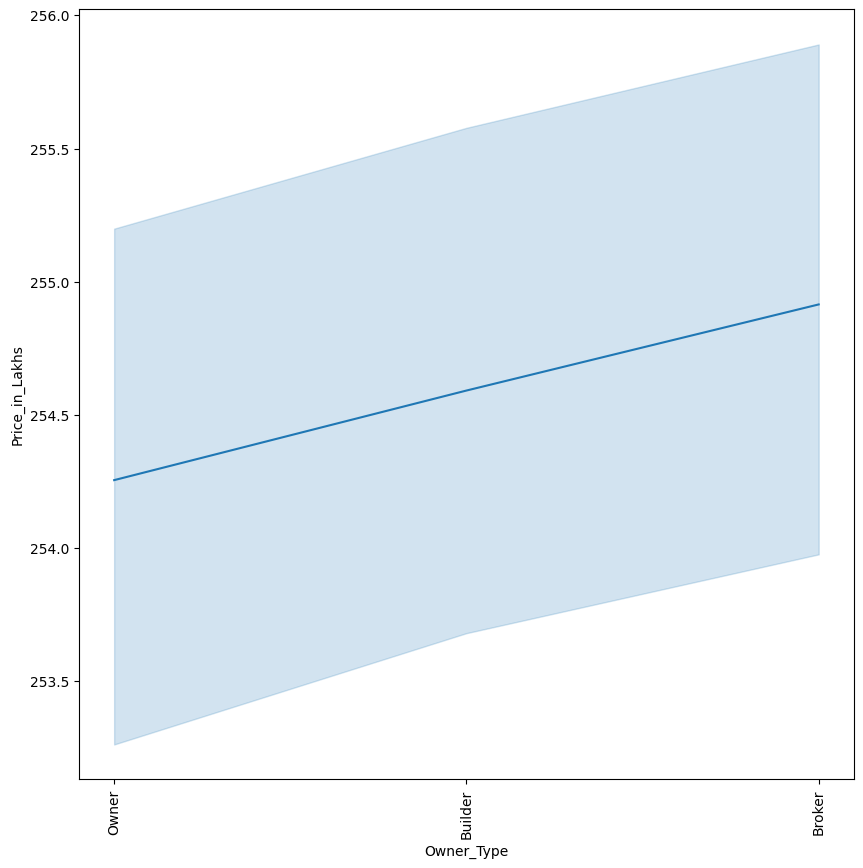

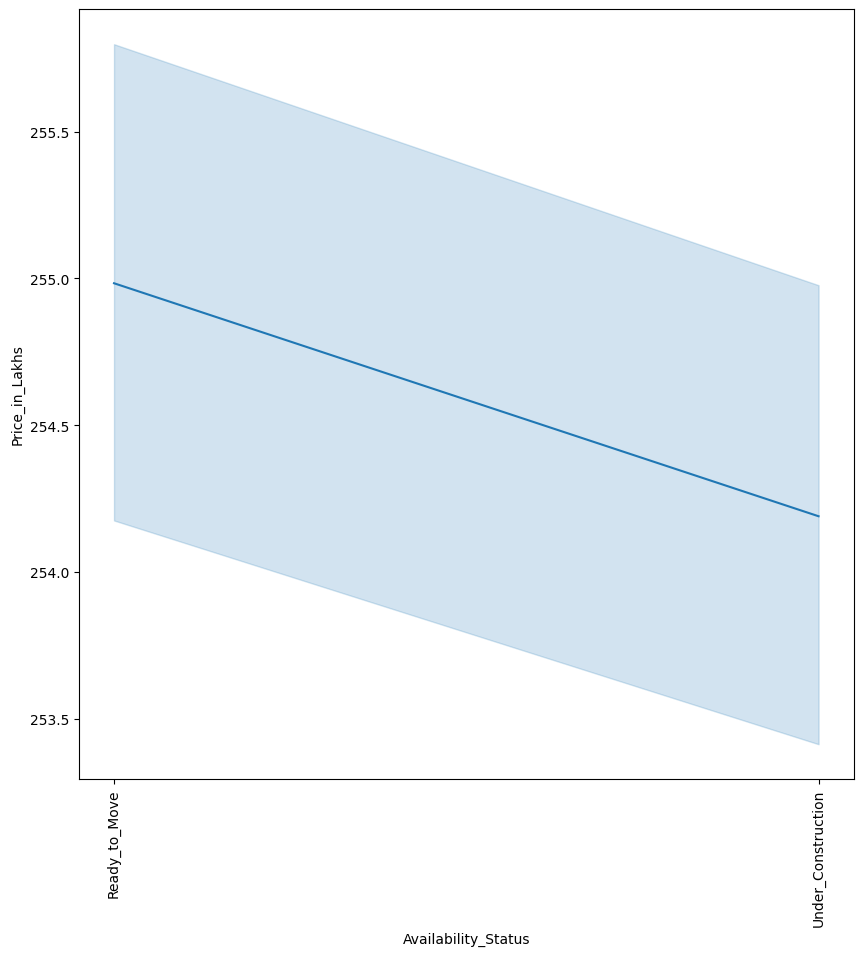

In [53]:
for i in z:
    if(z[i].dtype == "object") and( i != "Locality")  and (i != "Amenities"):
        plt.figure(figsize = (10, 10))
        sns.lineplot(x = z[i], y = z["Price_in_Lakhs"], data  = z)
        plt.xticks(rotation = 90)

In [54]:
z["ID"] = z["ID"].astype(str)

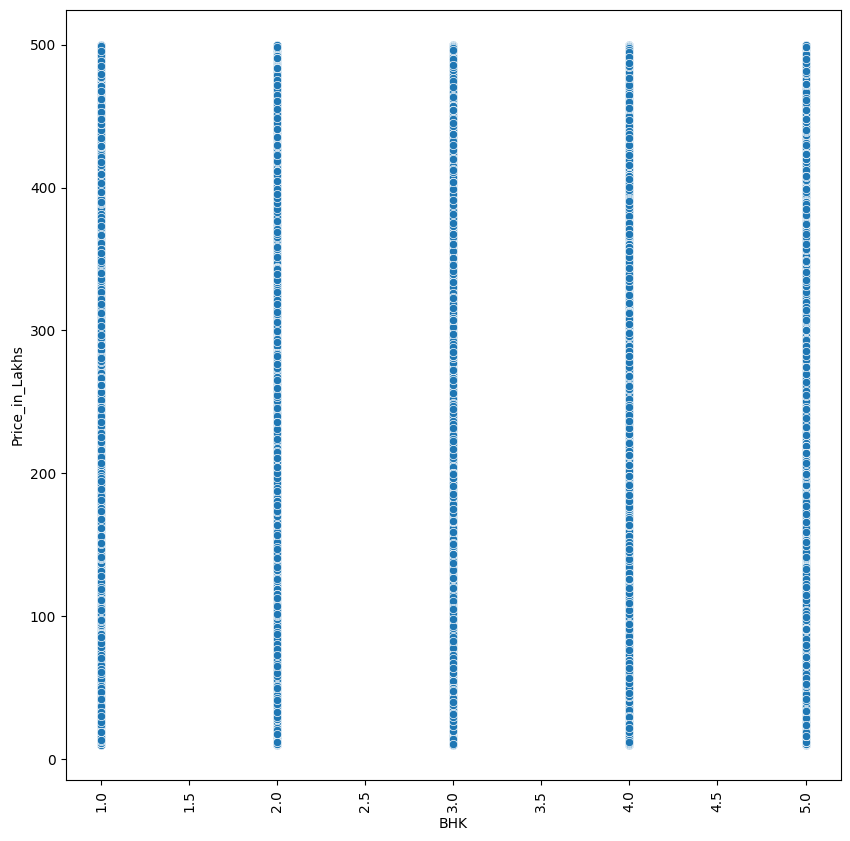

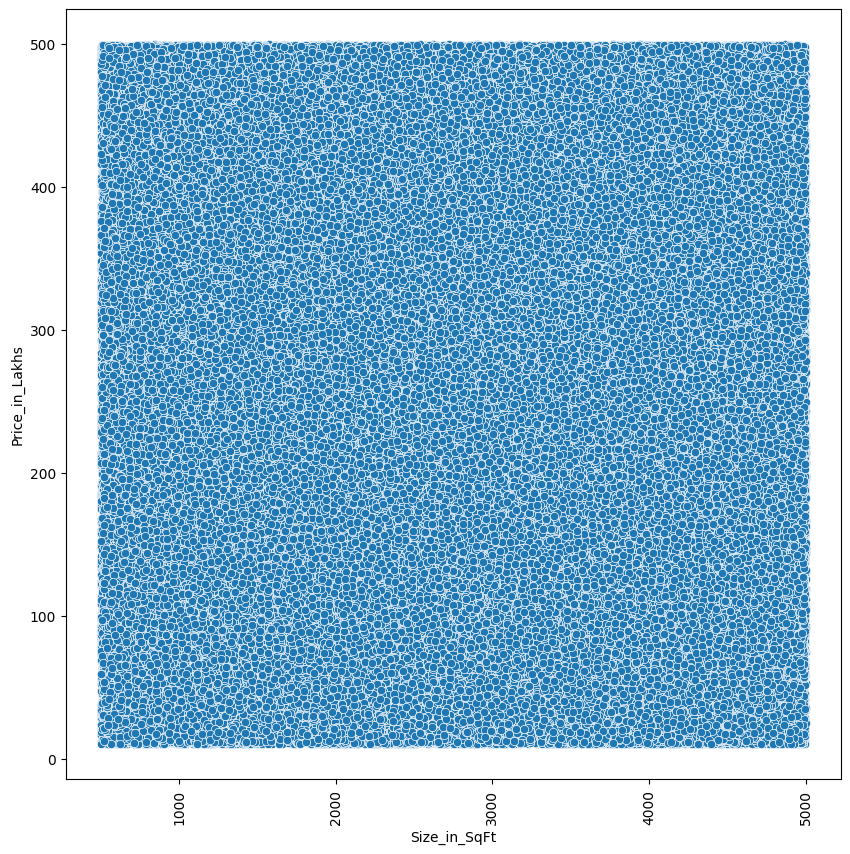

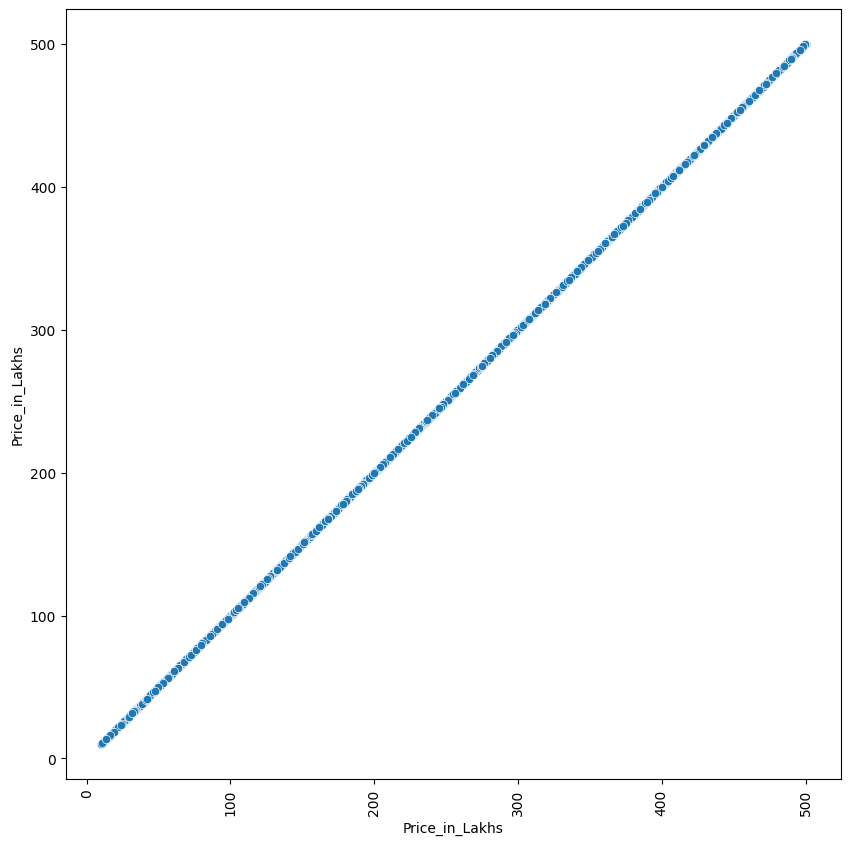

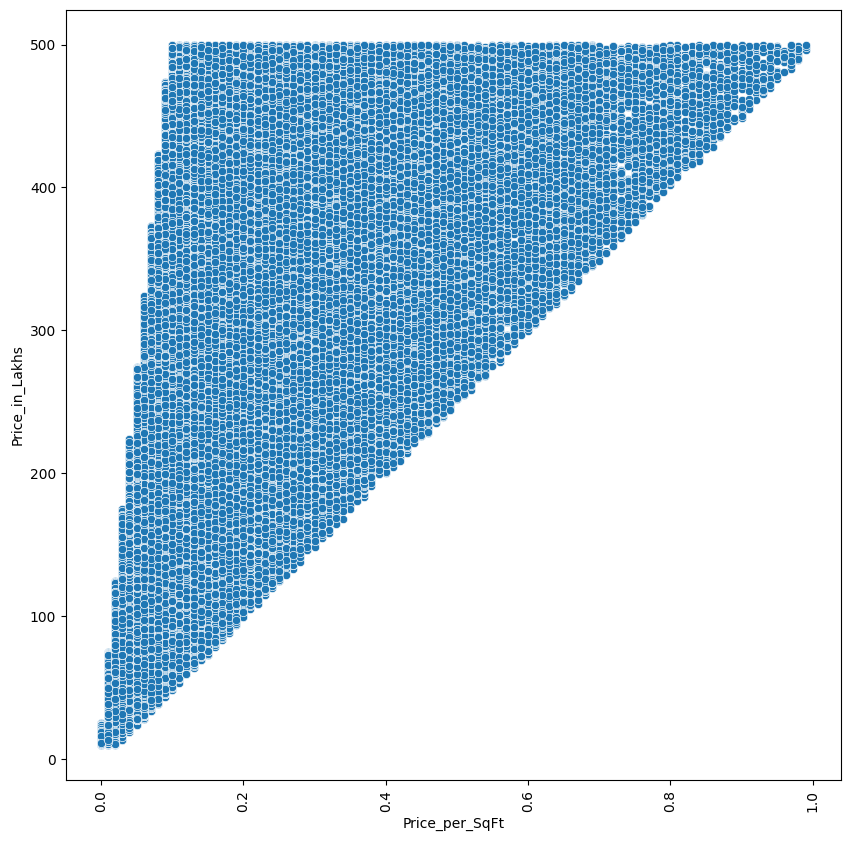

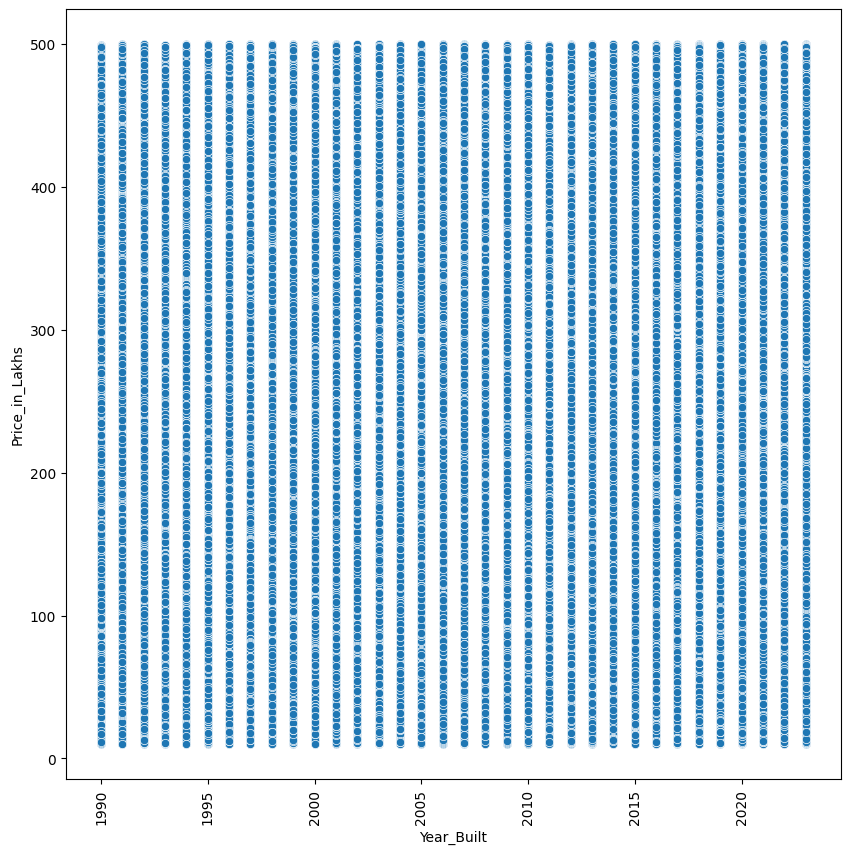

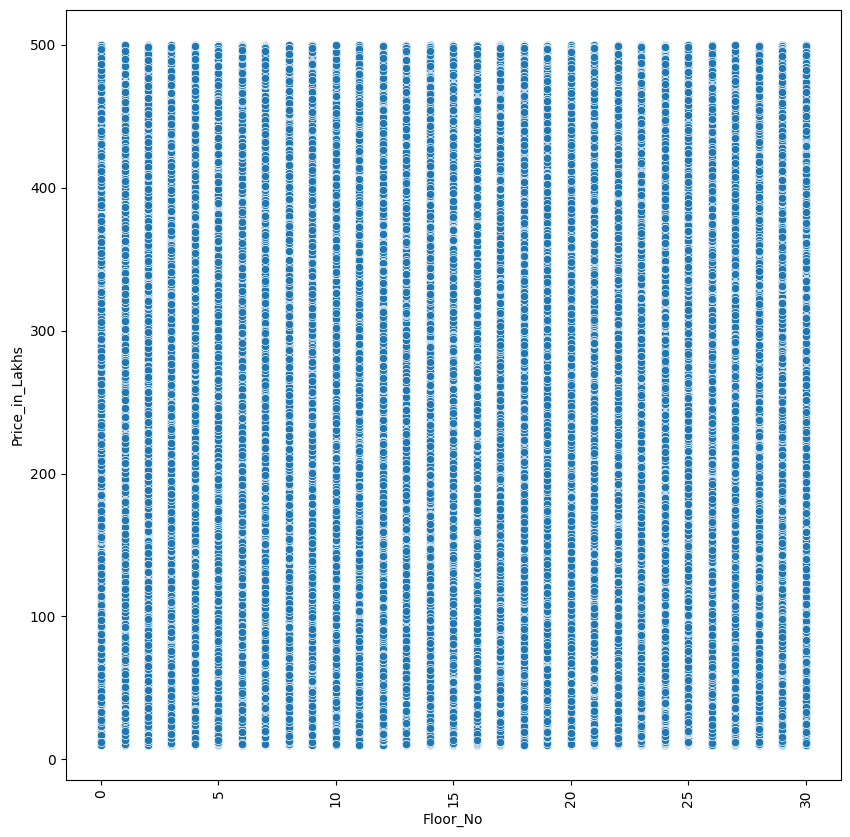

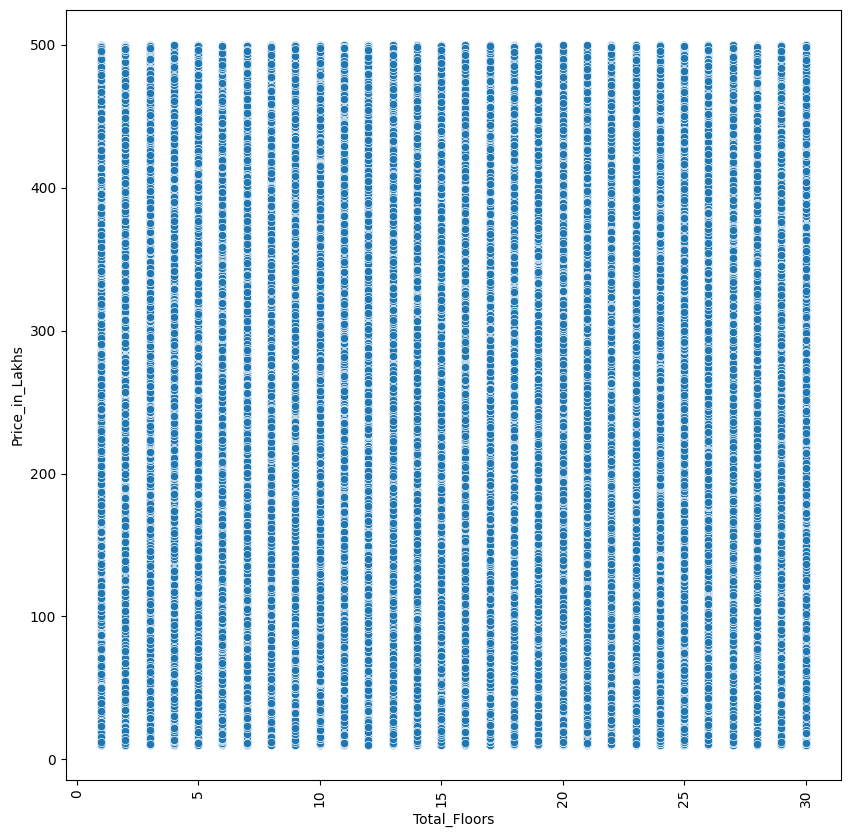

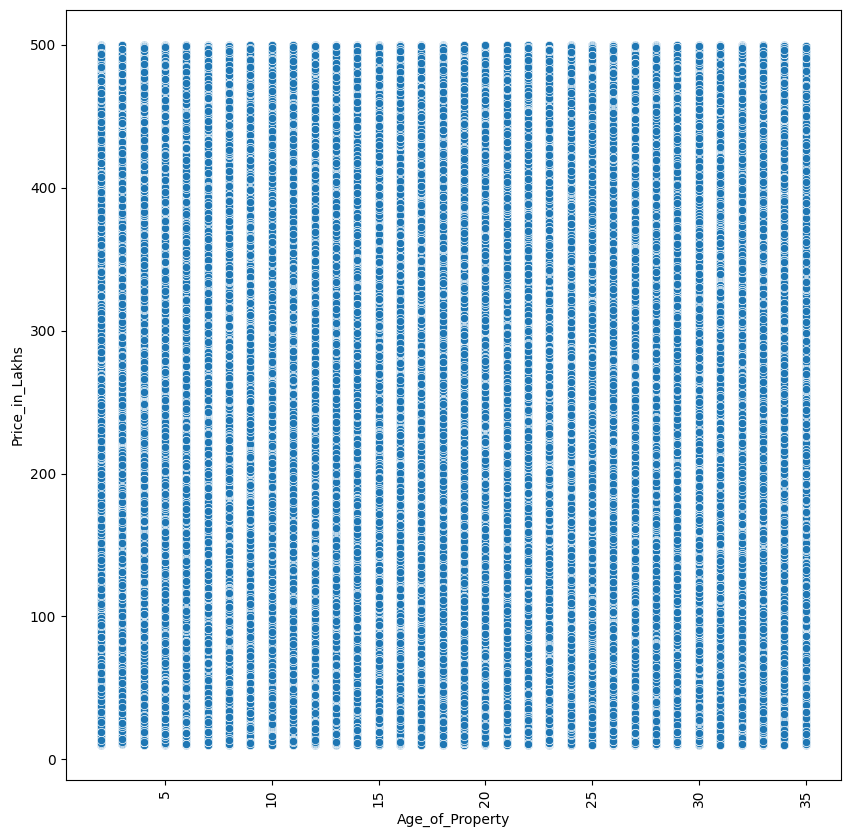

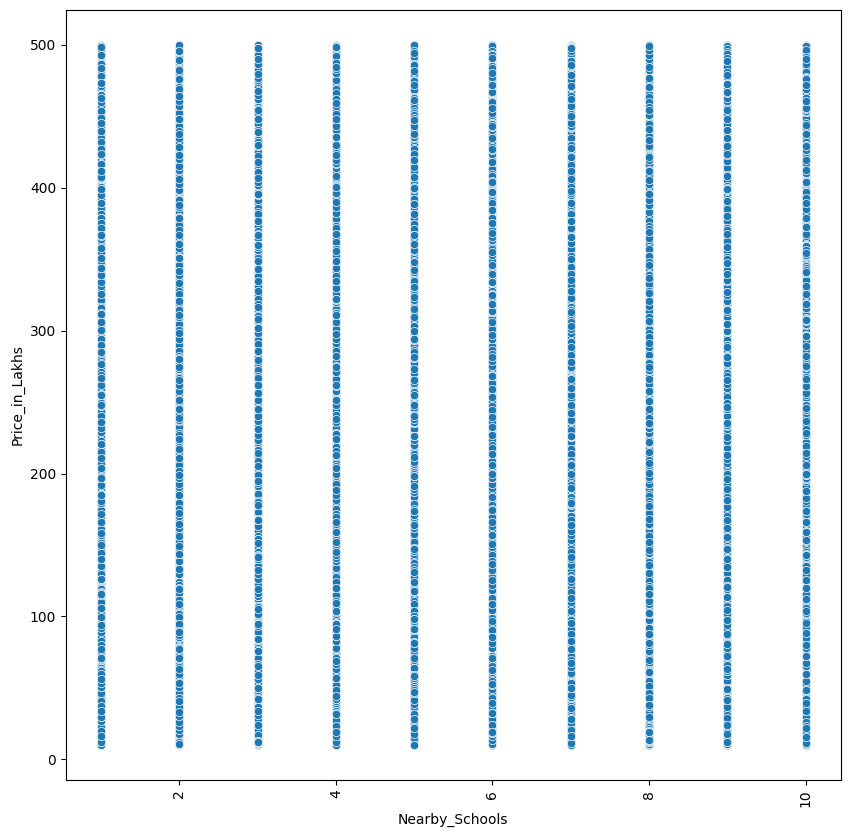

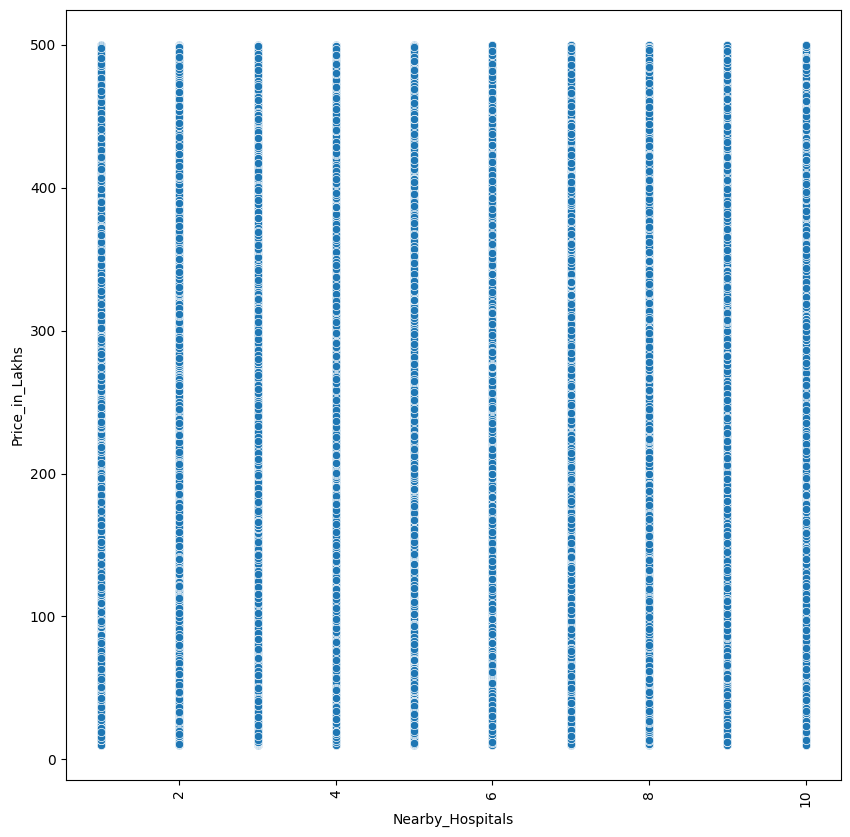

In [55]:
for i in z:
    if(z[i].dtype != "object"):
        plt.figure(figsize = (10, 10))
        sns.scatterplot(x = z[i], y = z["Price_in_Lakhs"], data  = z)
        plt.xticks(rotation = 90)

In [56]:
b = z.copy()
for i in b:
    if(b[i].dtype == "object"):
        b.drop([i], axis = 1, inplace = True)
b

,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
0,1,4740,489.76,0.10,1990,22,1,35,10,3
1,3,2364,195.52,0.08,2008,21,20,17,8,1
2,2,3642,183.79,0.05,1997,19,27,28,9,8
3,2,2741,300.29,0.11,1991,21,26,34,5,7
4,4,4823,182.90,0.04,2002,3,2,23,4,9
...,...,...,...,...,...,...,...,...,...,...
249995,5,1995,274.75,0.14,1995,19,7,30,8,6
249996,1,2293,13.40,0.01,2013,15,25,12,8,10
249997,4,2910,236.94,0.08,2003,21,30,22,10,4
249998,1,1149,141.66,0.12,2007,14,11,18,3,7


In [57]:
b

,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
0,1,4740,489.76,0.10,1990,22,1,35,10,3
1,3,2364,195.52,0.08,2008,21,20,17,8,1
2,2,3642,183.79,0.05,1997,19,27,28,9,8
3,2,2741,300.29,0.11,1991,21,26,34,5,7
4,4,4823,182.90,0.04,2002,3,2,23,4,9
...,...,...,...,...,...,...,...,...,...,...
249995,5,1995,274.75,0.14,1995,19,7,30,8,6
249996,1,2293,13.40,0.01,2013,15,25,12,8,10
249997,4,2910,236.94,0.08,2003,21,30,22,10,4
249998,1,1149,141.66,0.12,2007,14,11,18,3,7


In [58]:
X = b.copy()
X.drop(["Price_in_Lakhs"], axis = 1, inplace = True)
Y = b["Price_in_Lakhs"]

In [59]:
from sklearn.decomposition import PCA

In [60]:
a = PCA()
x = a.fit_transform(X)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [63]:
n = RandomForestRegressor()
n.fit(x_train, y_train)

RandomForestRegressor()

In [64]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [65]:
round(r2_train, 2)*100

100.0

In [66]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [67]:
round(r2_test, 2)*100

100.0